## State of art CNN Architectures

ImageNet dataset consists of about 14 M hand-labelled annotated images which contains over 22,000 day-to-day categories. Many winning solutions of the ImageNet Challenge have used state of the art convolutional neural network architectures to beat the best possible accuracy thresholds. In this kernel, we will discuss popular CNN architectures such as VGG16, 19, ResNet, AlexNet etc. In the end, we will generate image features using pretrained models and use them in models.

1. CNN Architectures
  * VGG16
  * VGG19
  * InceptionNet
  * Resnet
  * XceptionNet
2. Image Feature Extraction
3. Transfer Learning


### VGG16
VGG16 was publised in 2014. This network contains total **16** layers in which weights and bias parameters are learnt. A total of **13 convolutional layers** are stacked one after the other and **3 dense layers** for classification.
The number of filters in the convolution layers follow an **increasing pattern** (similar to decoder architecture of autoencoder).
The informative features are obtained by **max pooling** layers applied at different steps in the architecture.
The **dense layers** comprises of **4096**, **4096**, and **1000** nodes each.
The cons of this architecture are that it is slow to train and produces the model with very large size.

![](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

**Before starting to code, add your "kaggle.json" file to current directory ("/content/")**

In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

In [2]:
INPUT_SIZE = (224, 224, 1)

input = Input(INPUT_SIZE)

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat = Flatten()(pool5)
dense1 = Dense(4096, activation='relu')(flat)
dense2 = Dense(4096, activation='relu')(flat)
output = Dense(1000, activation='softmax')(dense2)

vgg16_model = Model(inputs=input, outputs=output)

### Pretrained VGG16

In [3]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle competitions download dogs-vs-cats-redux-kernels-edition

100% 812M/814M [00:04<00:00, 202MB/s]
100% 814M/814M [00:04<00:00, 177MB/s]


In [8]:
! pwd

/content


In [9]:
current_directory = '/content/'

In [10]:
import zipfile

def unzip_file_to_current_directory(data_path):
  with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall(current_directory)

In [11]:
data_path = current_directory + 'dogs-vs-cats-redux-kernels-edition.zip'
train_data_path = current_directory + 'train.zip'
test_data_path = current_directory + 'test.zip'

In [12]:
unzip_file_to_current_directory(data_path)
unzip_file_to_current_directory(train_data_path)
unzip_file_to_current_directory(test_data_path)

In [13]:
img1 = current_directory + 'train/cat.11679.jpg'
img2 = current_directory + 'train/dog.2811.jpg'

sample_imgs = [img1, img2]

In [14]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.utils import load_img
from keras.utils import img_to_array
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os

In [15]:
def _load_img(img_path):
  img = load_img(img_path, target_size=(224, 224))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)
  return img

In [16]:
def _get_predictions(_model, num):
  f, ax = plt.subplots(1, num)
  f.set_size_inches(80, 40)
  for i in range(num):
    ax[i].imshow(Image.open(sample_imgs[i]).resize((200,200), Image.ANTIALIAS))
  plt.show()

  f, axes = plt.subplots(1, num)
  f.set_size_inches(80, 20)
  for i ,img_path in enumerate(sample_imgs):
    img = _load_img(img_path)
    preds = decode_predictions(_model.predict(img), top=3)[0]
    b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color='gray', ax=axes[i])
    b.tick_params(labelsize=55)
    f.tight_layout() 

553467096/553467096 [==============================] - 4s 0us/step


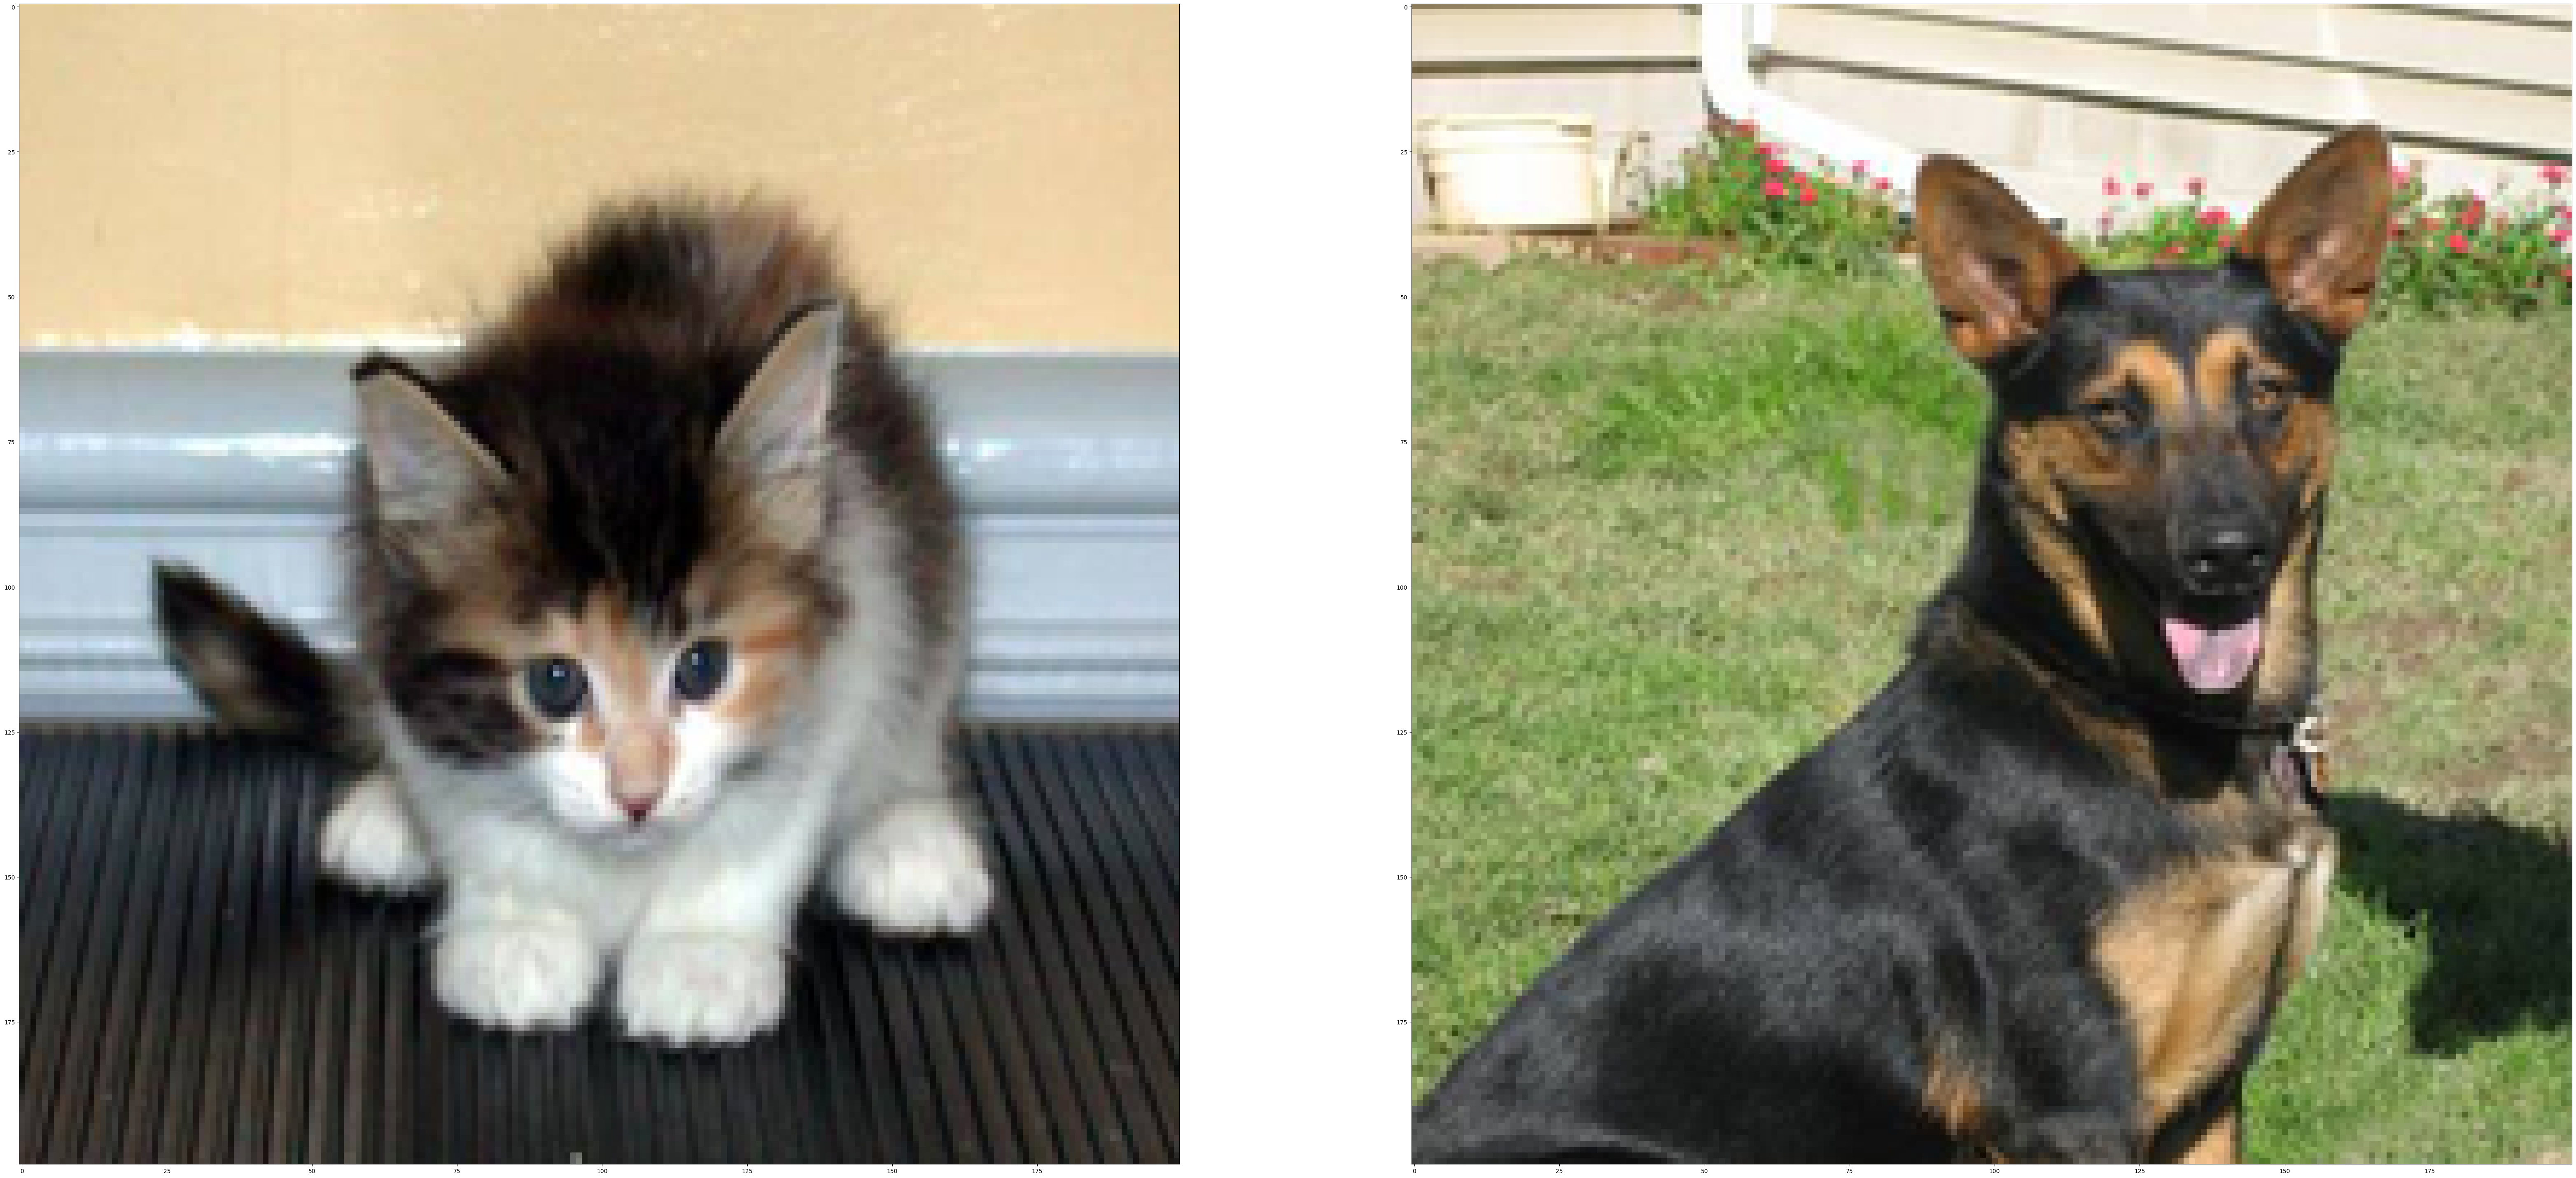

1/1 [==============================] - 1s 648ms/step


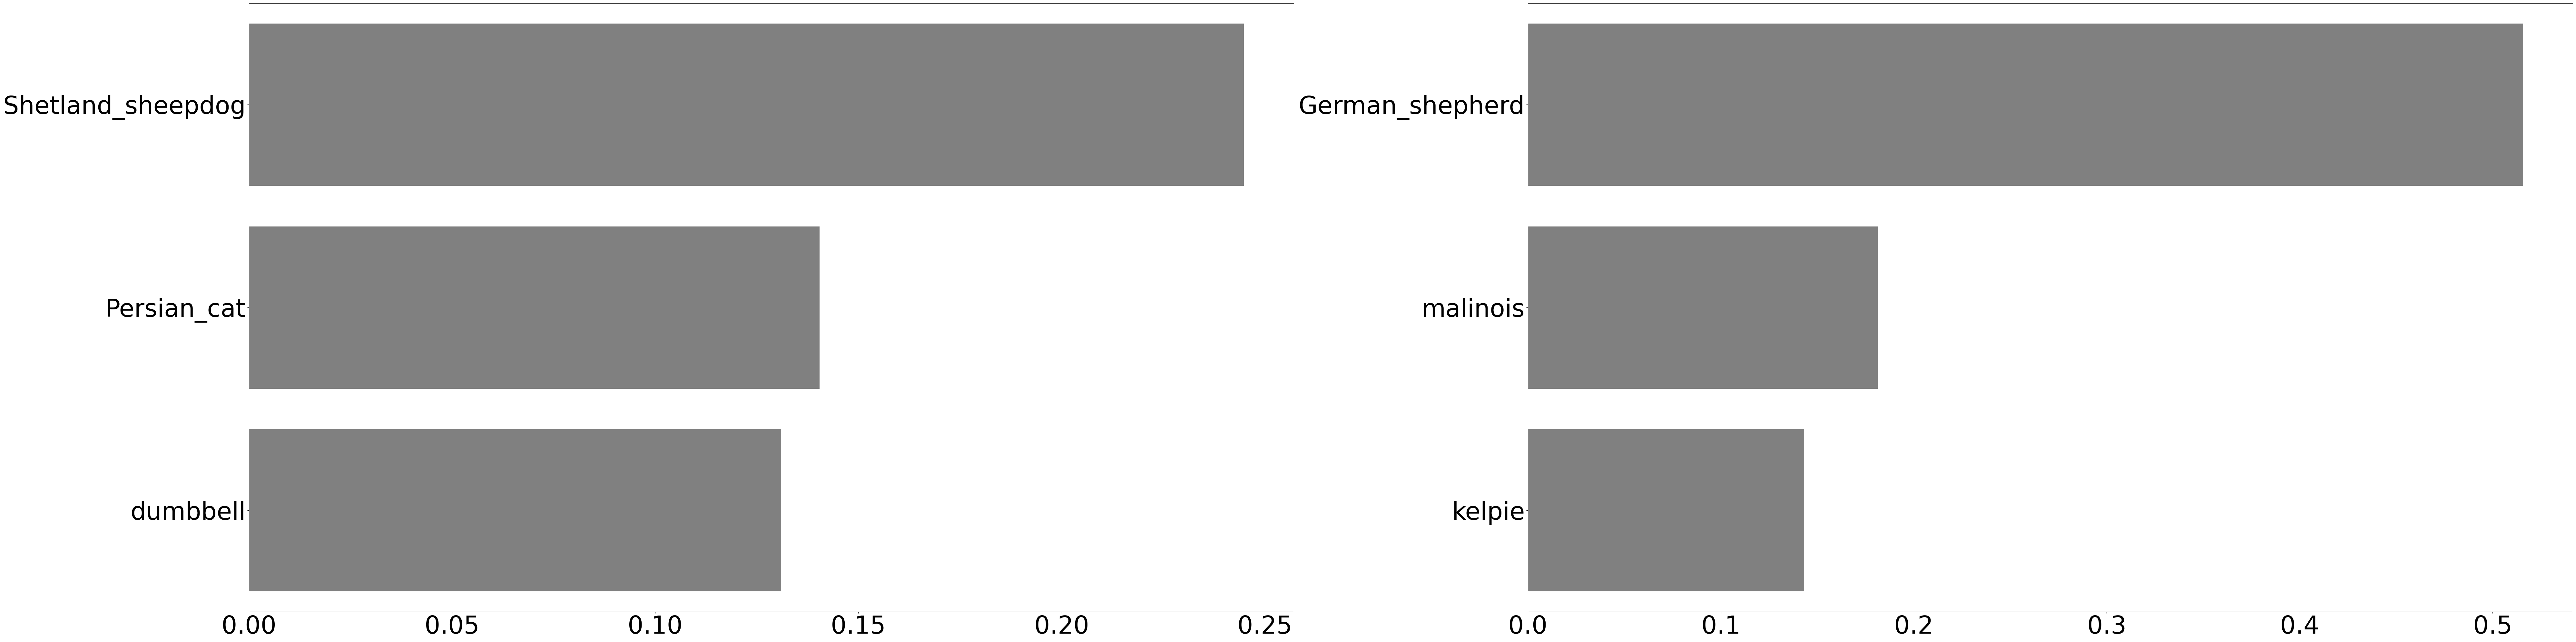

In [17]:
# Add vgg16_weights_tf_dim_ordering_tf_kernels.h5 weights file to your workspace
# vgg16_weights = '../content/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
# vgg16_model = VGG16(weights=vgg16_weights)

# OR use default weights for VGG16 (ImageNet)
vgg16_model = VGG16()

_get_predictions(vgg16_model, len(sample_imgs))

### VGG19

VGG19 is a similar model architecure as VGG16 with **three additional convolutional layers**, it consists of a total of **16 Convolution layers** and **3 dense layers**. Following is the architecture of VGG19 model. In VGG networks, the use of **3 x 3 convolutions** with **stride 1** gives an effective receptive filed equivalent to 7 * 7. This means there are fewer parameters to train.

![](https://www.researchgate.net/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg)

574710816/574710816 [==============================] - 3s 0us/step


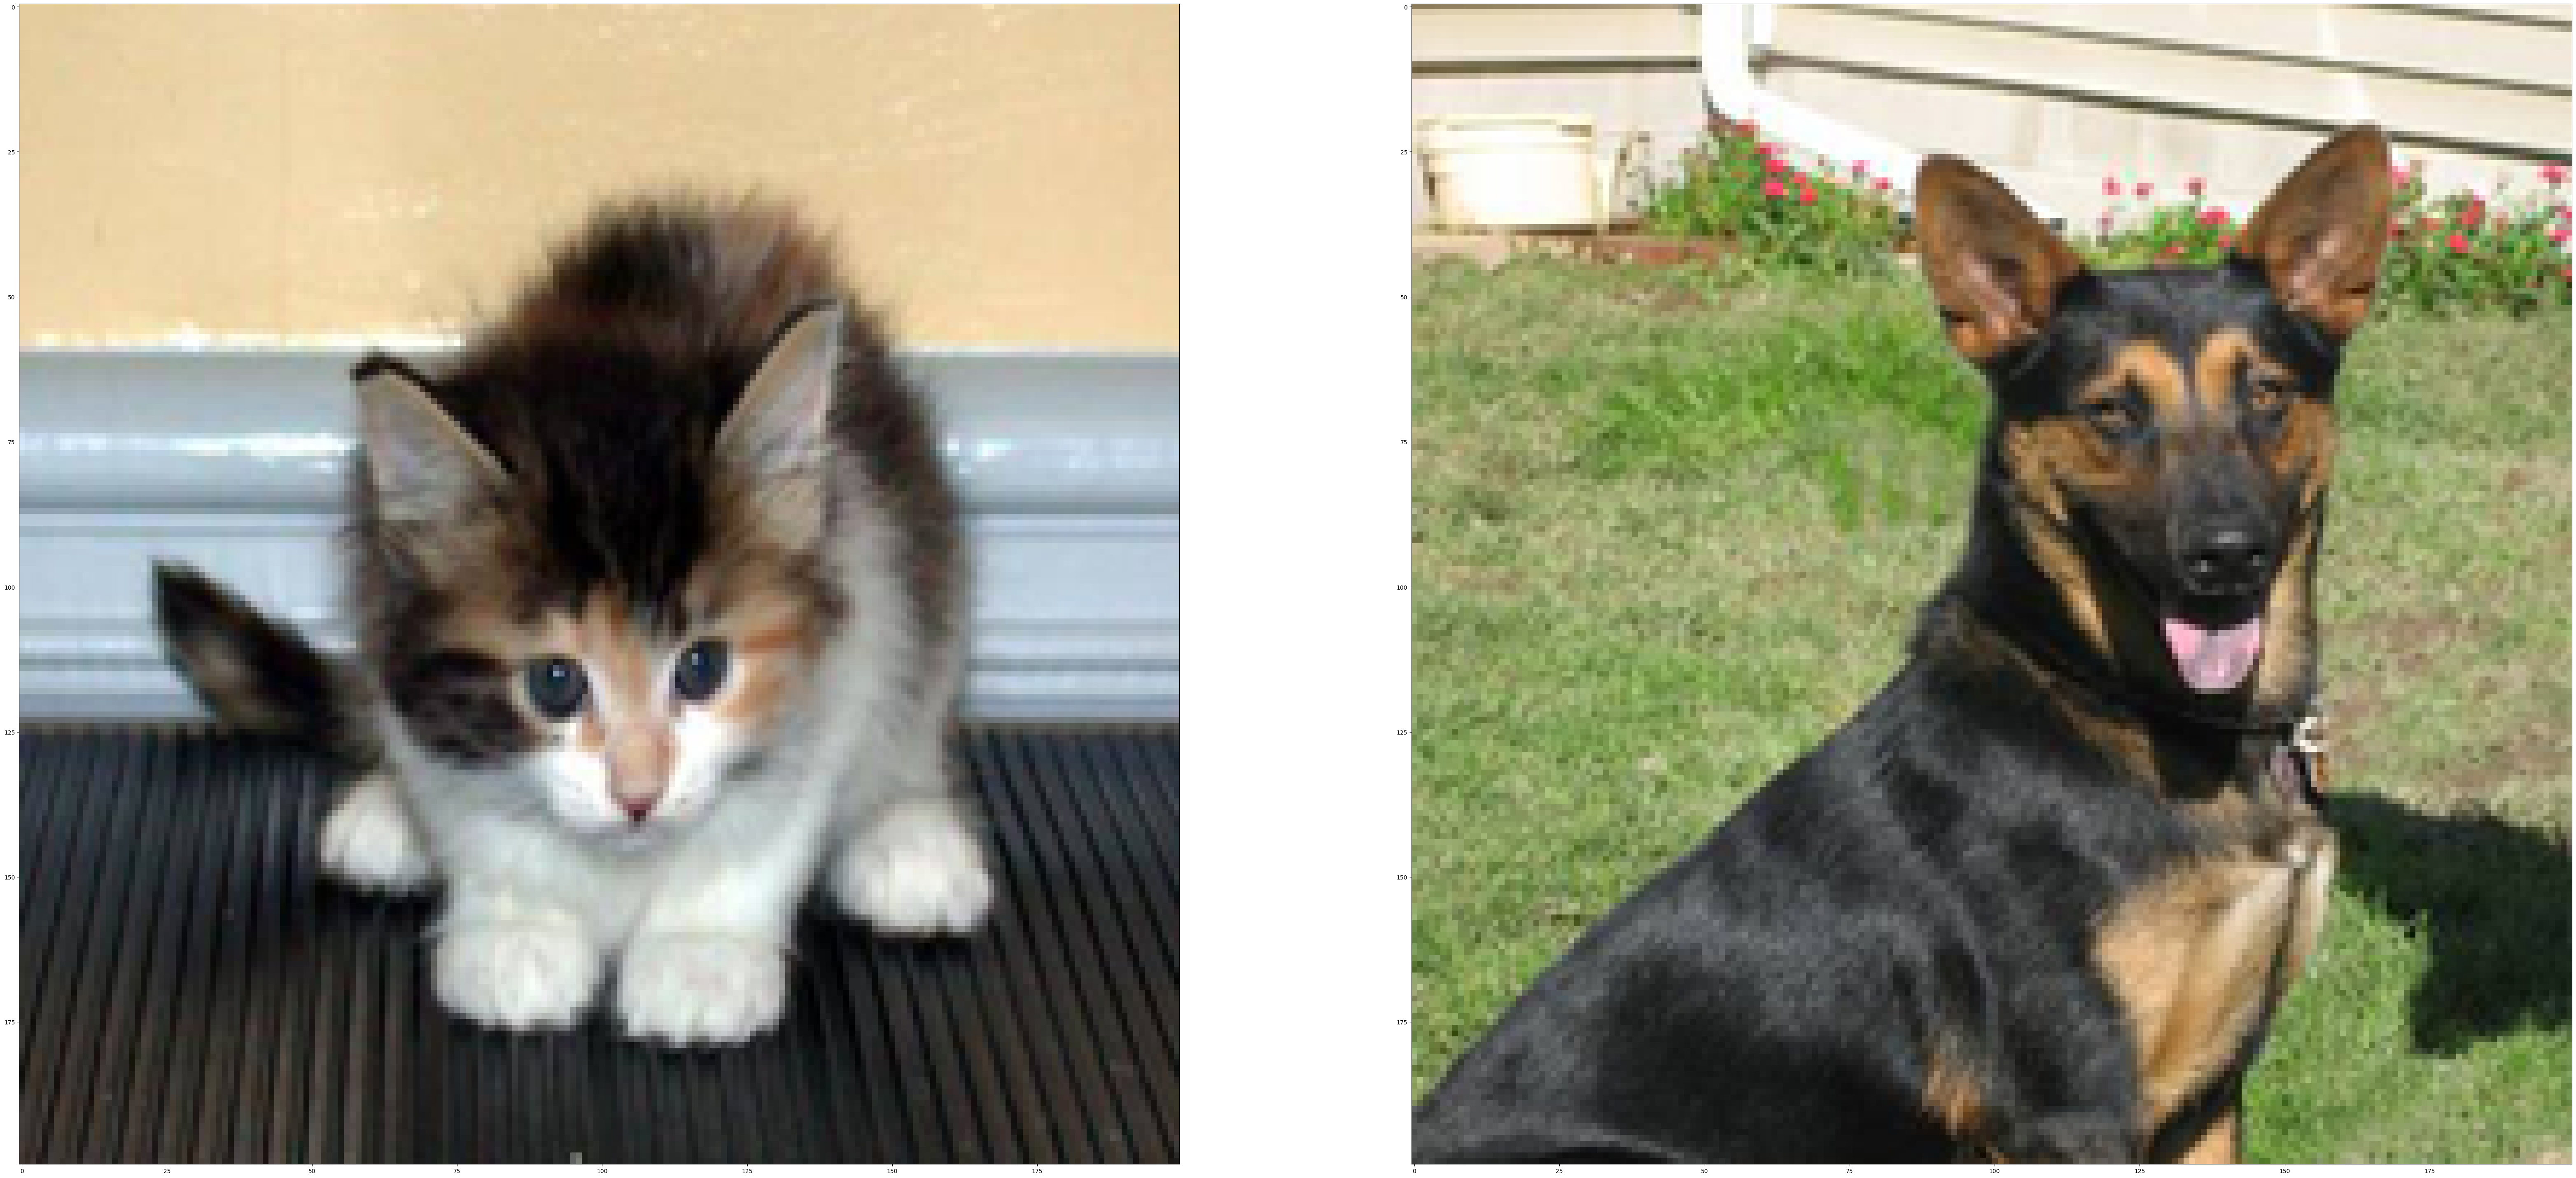

1/1 [==============================] - 1s 722ms/step


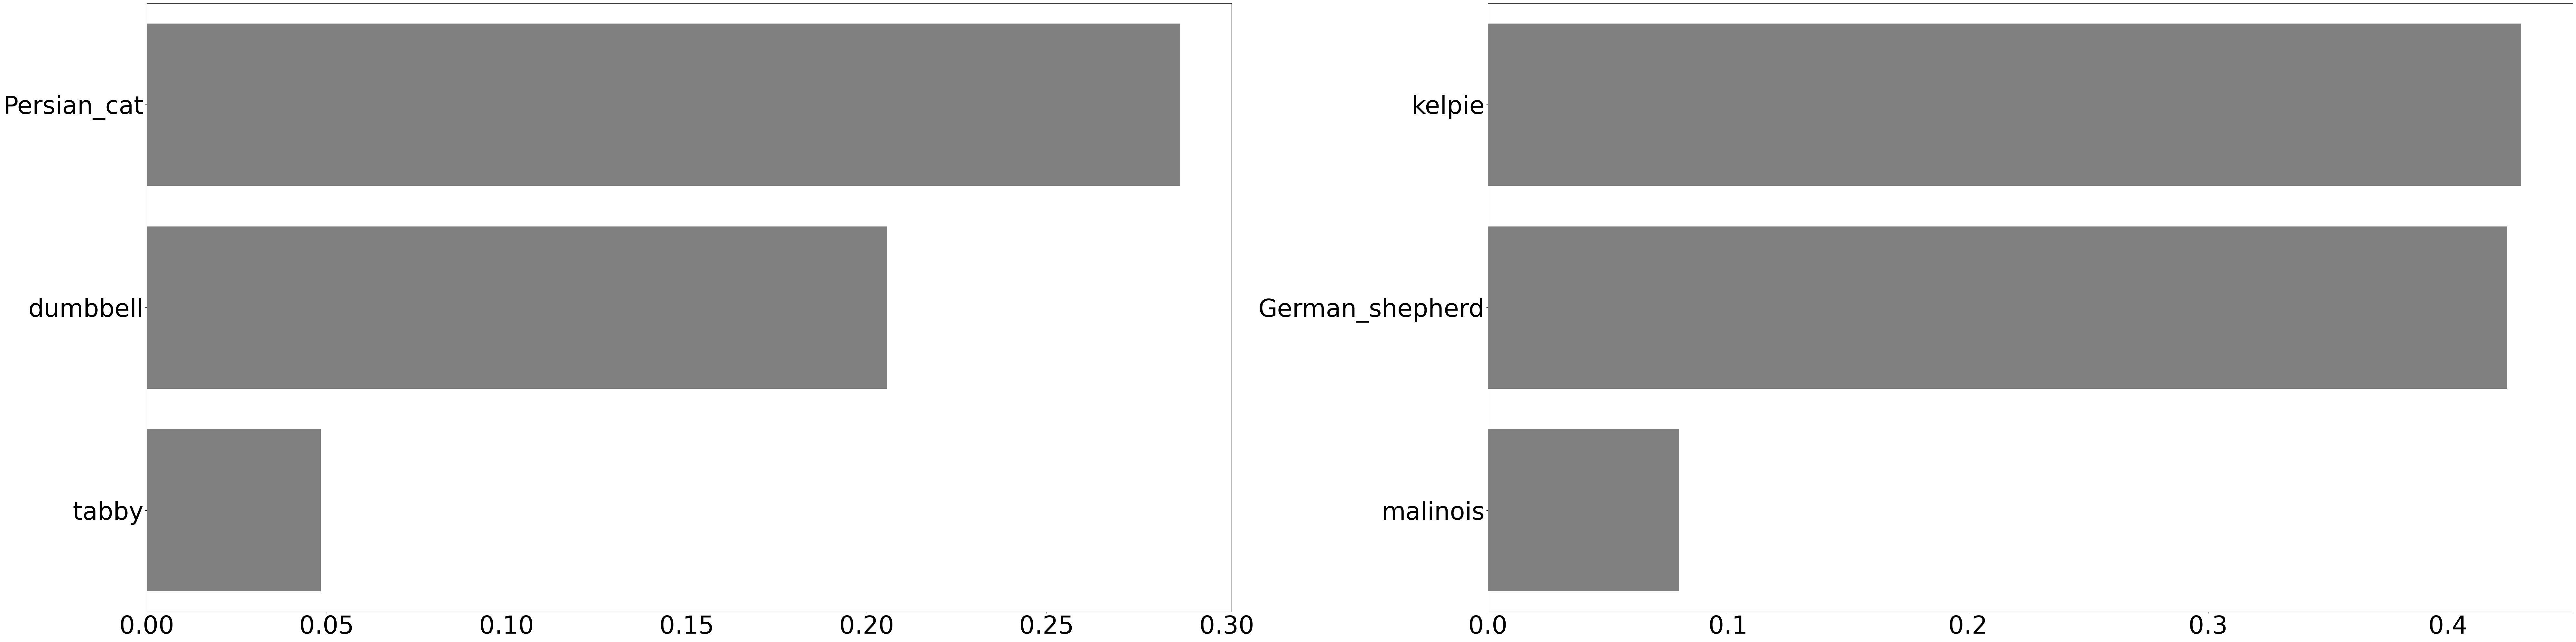

In [18]:
from keras.applications.vgg19 import VGG19

# Add vgg19_weights_tf_dim_ordering_tf_kernels.h5 weights file to your workspace
# vgg19_weights = '../content/vgg19/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
# vgg19_model = VGG19(weights=vgg19_weights)

# OR use default weights for VGG19 (ImageNet)
vgg19_model = VGG19()
_get_predictions(vgg19_model, len(sample_imgs))

### InceptionNets (GoogleNet)

Also known as GoogleNet consists of total **22 layers** and was the winning model of 2014 ImageNet challenge.

Inception modules are the fundamental block of InceptionNets. The key idea of inception module is to design good **local network topology** (network within a network)
These modules or blocks acts as the **multi-level feature extractor** in which convolutions of different sizes are obtained to create a diversified feature map
The inception modules also consists of **1 x 1 convolution blocks** whose role is to perform **dimentionaltiy reduction**.
By performing the 1x1 convolution, the inception block preserves the spatial dimensions but reduces the depth. So the overall network's dimensions are not increased exponentially.
Apart from the regular output layer, this network also consists of two auxillary classification outputs which are used to inject gradients at lower layers.

![](https://miro.medium.com/v2/resize:fit:1400/1*U_McJnp7Fnif-lw9iIC5Bw.png)

"Bharath Raj, A Simple Guide to the Versions of the Inception Network", https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202

![](https://cdn-images-1.medium.com/max/2000/1*uXfC5fcbDsL0TJG4T8PsVw.png)

The complete architecture of Inception Net

https://www.kaggle.com/code/shivamb/cnn-architectures-vgg-resnet-inception-tl/notebook

87910968/87910968 [==============================] - 0s 0us/step


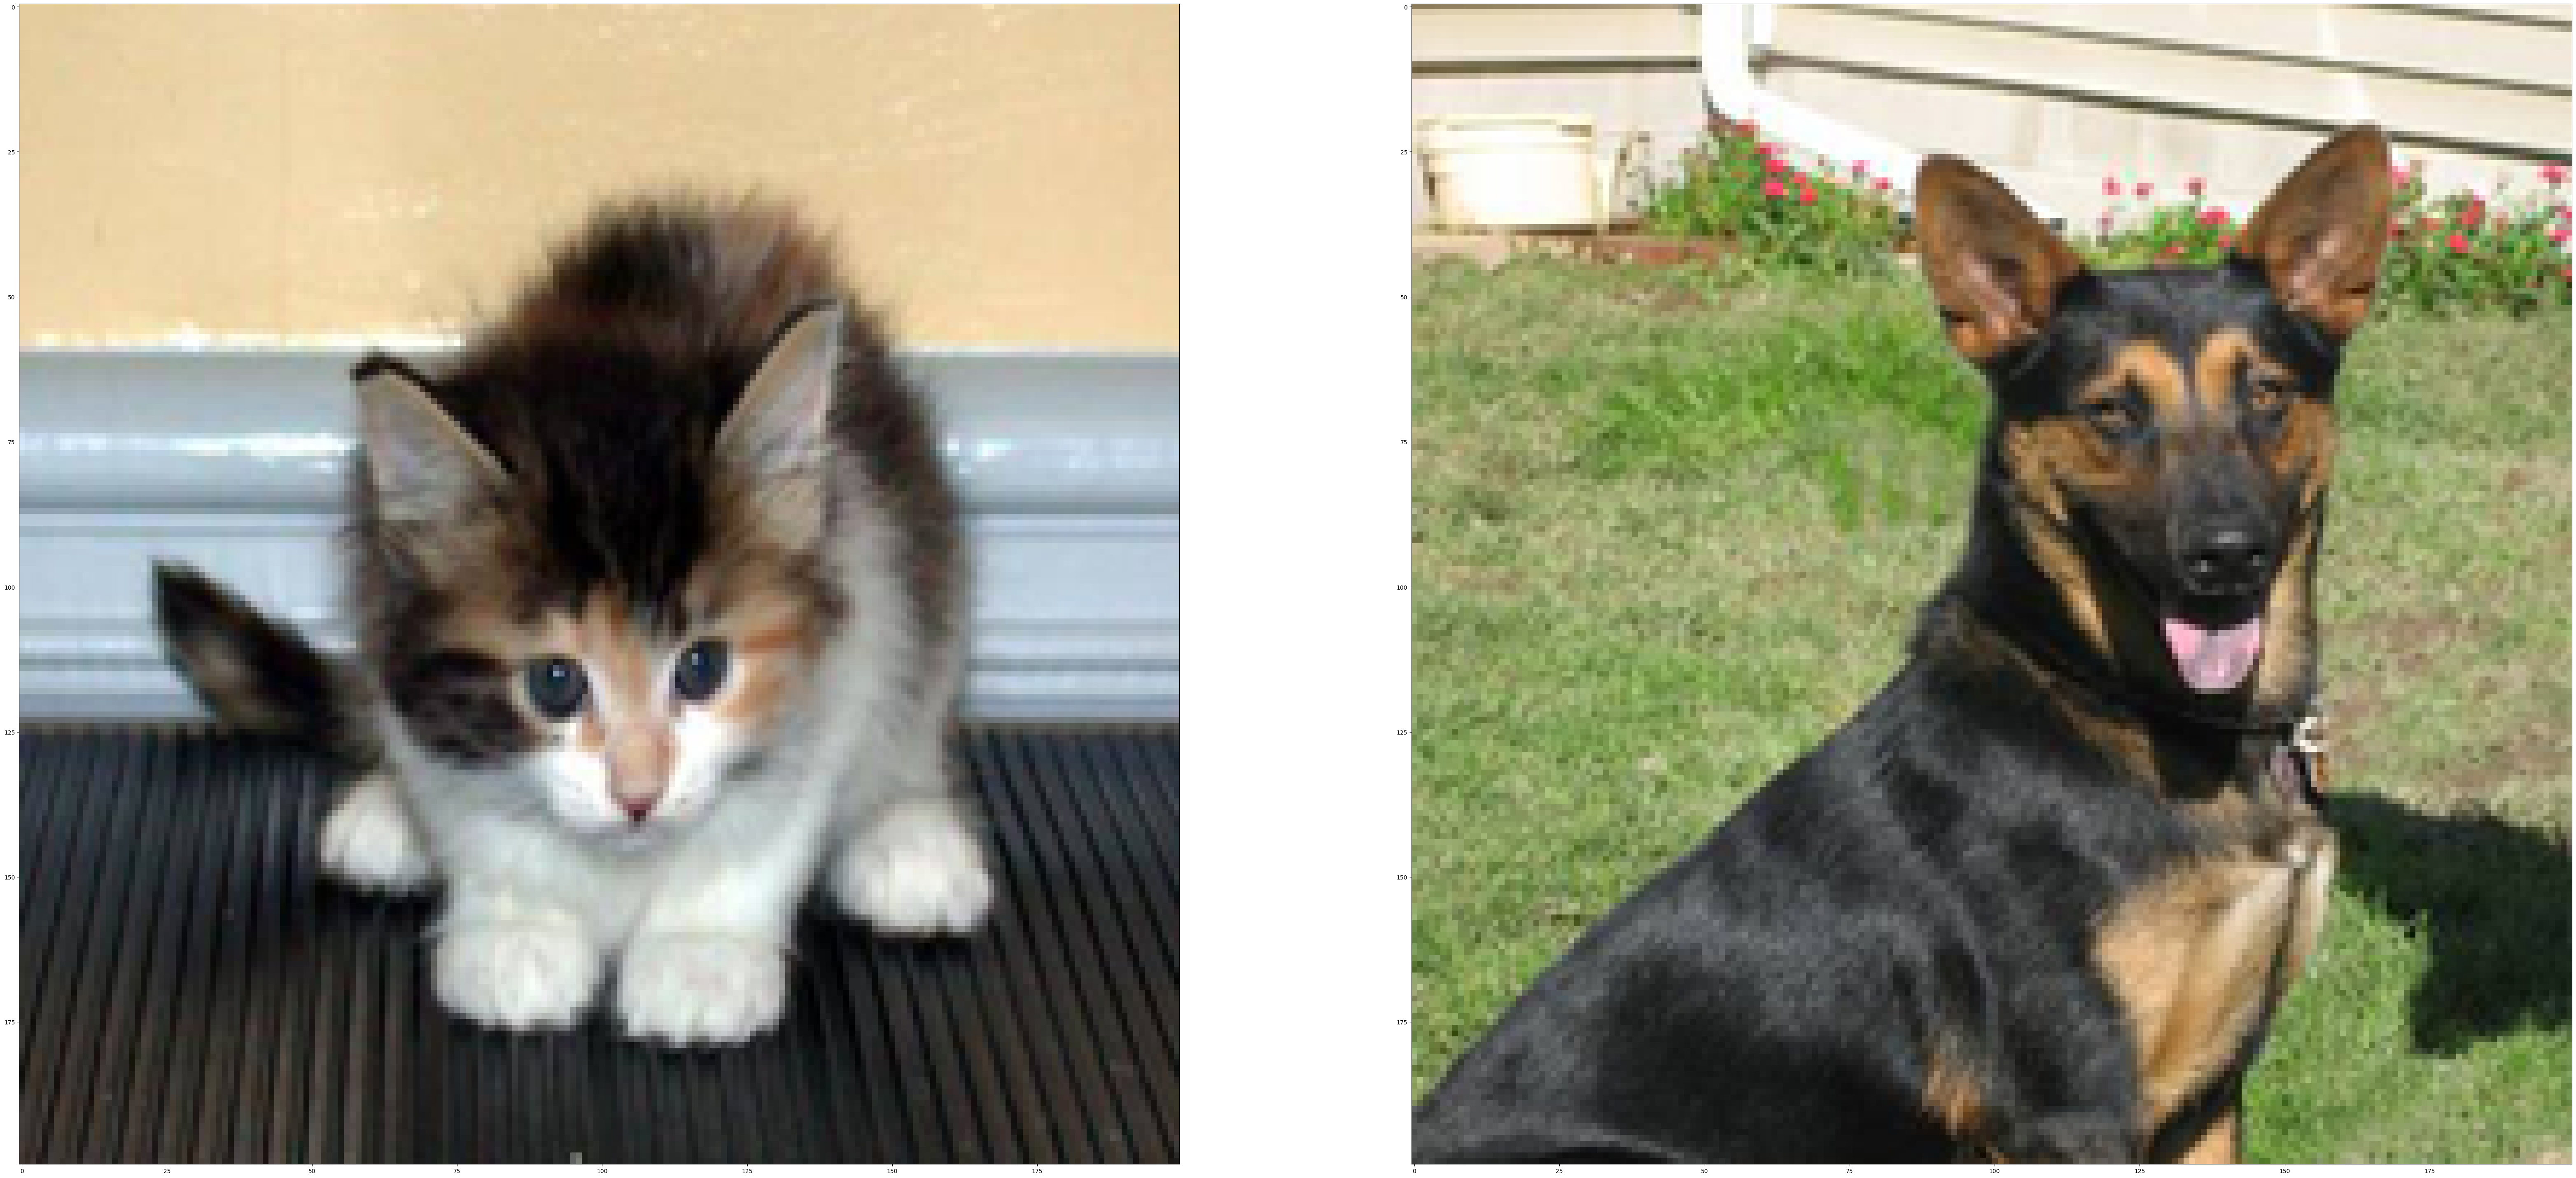

1/1 [==============================] - 2s 2s/step


ValueError: ignored

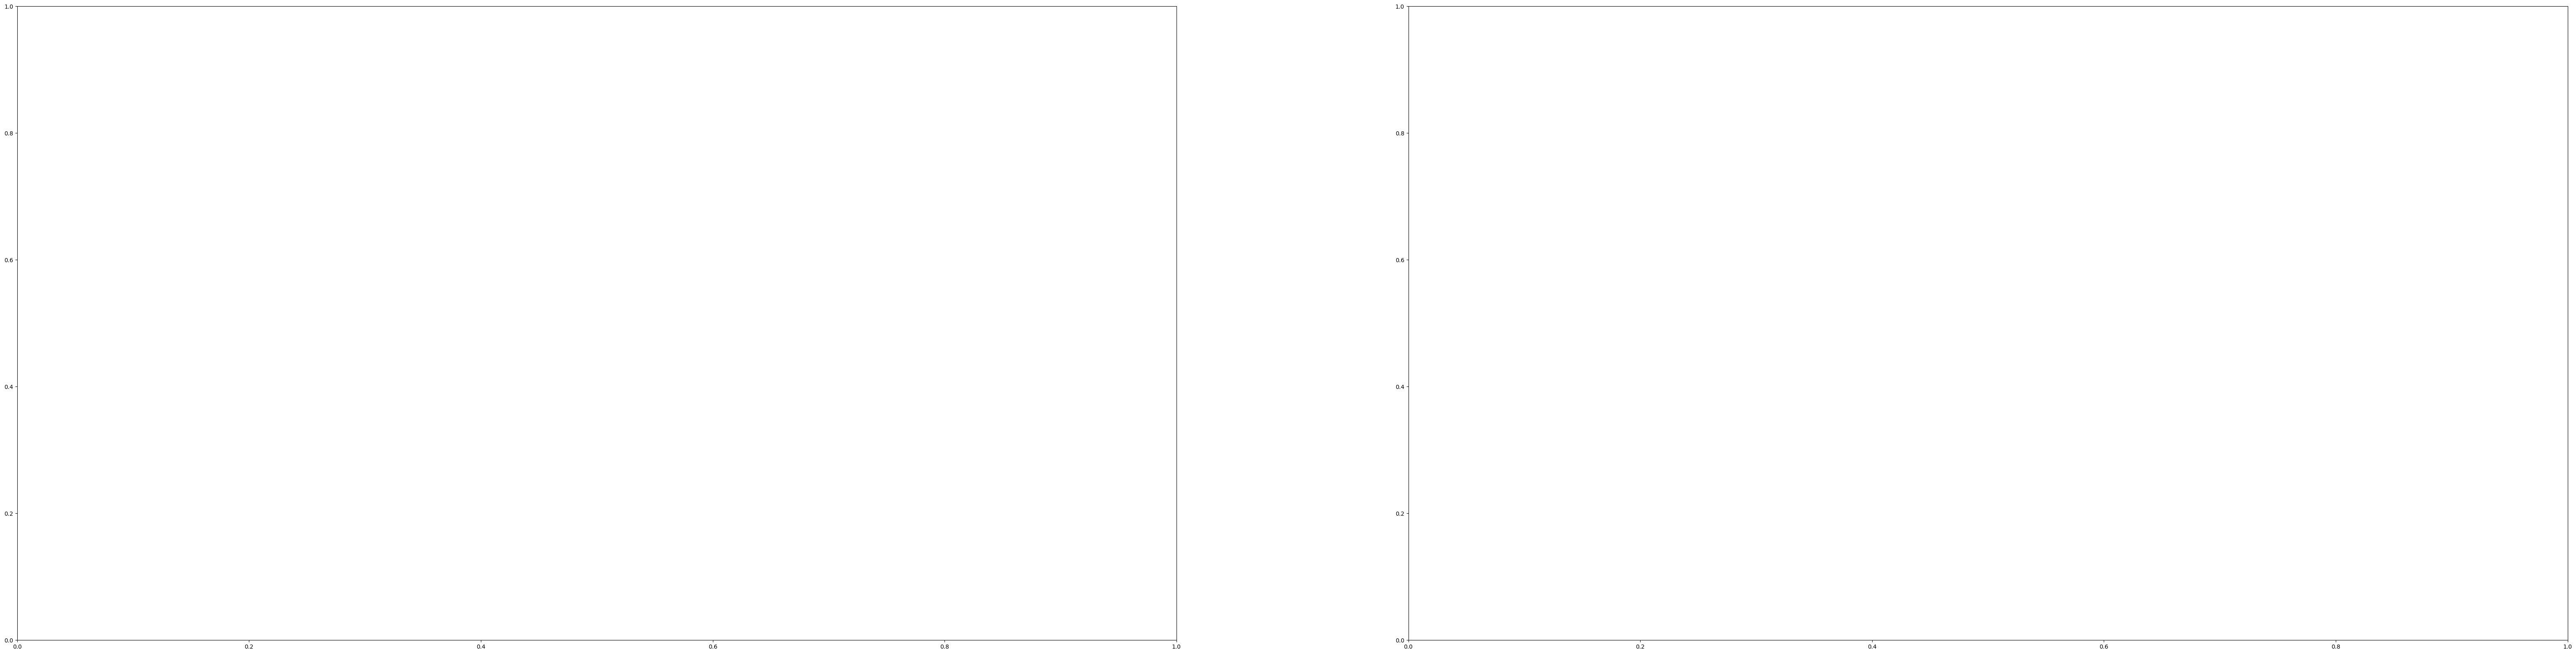

In [19]:
from tensorflow.keras.applications.inception_v3 import  InceptionV3

# Add inception_v3_weights_tf_dim_ordering_tf_kernels.h5 weights file to your workspace
# inception_weights = '../input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'
# inception_model = InceptionV3(weights=inception_weights)

# OR use default weights for InceptionNet (ImageNet)
'''
Optional shape tuple, only to be specified if include_top is False (otherwise 
the input shape has to be (299, 299, 3) (with channels_last data format) or (3, 299, 299) 
(with channels_first data format). It should have exactly 3 inputs channels, and width and 
height should be no smaller than 75. E.g. (150, 150, 3) would be one valid value. input_shape 
will be ignored if the input_tensor is provided.
'''
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')
_get_predictions(inception_model, len(sample_imgs))

### Resnets

All the previous models used deep neural networks in which they stacked many convolution layers one after the other. It was learnt that deeper networks are performing better. However, it turned out that this is not really true. Following are the problems with deeper networks:

* Network becomes difficult to optimize
* Vanishing / Exploding Gradeints
* Degradation Problem ( accuracy first saturates and then degrades)

#### Skip Connections

Authors of the resnet architecture came up with the idea of **skip connections** with the hypothesis that the **deeper layers** should be able to **learn** something as equal as shallower layers. 

A possible solution is **copying the activations** from shallower layers and setting **additional layers** to identity mapping. These connections are enabled by skip connections which are shown in the following figure.

![](https://cdn-images-1.medium.com/max/987/1*pUyst_ciesOz_LUg0HocYg.png)

So the role of these connections is to perform **identity function** over the **activation** of **shallower** layer, which in-turn produces the same activation. This output is then **added with the activation of the next layer**. To enable these connections or essentially enable this addition operation, one need to ensure the same dimensions of convolutions through out the network, that's why Resnets have same **3 by 3 convolutions** throughout.

By using residual blocks in the network, one can construct networks of any depth with the hypothesis that new layers are actually helping to learn new underlying patterns in the input data. The authors of the paper were able to create the deep neural network architecture with **152 layers**. The variants of Resnets such as **resnet34**, **resnet50**, **resnet101** have produced the solutions with very high accuracy in Imagenet competitions.

![](https://i.imgur.com/9j8bKaY.png)

A. The Neural Network without residual network

B. The Neural Network with residual block (with 2 extra layers and skip connection)

The activation A1 is being passed to Residual Block which in turn gives new activation A3.

* If there is no skip connection, then A3:

**A3 = relu (W2.A2 + b2)** ... (without skip connection) where W2 and b2 are weights and bias associated with layer L2.  With skip connection another term A1 will be passed to L2. The equation of A3 will be modified as:

**A3 = relu (W2.A2 + b2 + A1)**

If we use L2 regularization or the weight decay methods, W2 and b2 will be forced to become close to zero. For the worst case, if these terms become 0, then:

**A3 = relu (A1)**

Because Relu will output 0 for negative, A1 for positive and we know A1 is the previous activation from Relu which is positive.

**A3 = A1**

* Identity function is easy for Residual block to learn.
* Adding the residual blocks / skip connections does not hurt the network performance but infact increases the chances that new layers will learn something useful.

! **Identity function**: Sometimes you do not need to use any activation function for a specific layer. But to hold consistency across all layers, you need to create and store a dummy activation function for that layer. That activation function is the Identity function, which outputs whatever it is given as input.

**f(x) = x**

https://arxiv.org/pdf/1512.03385.pdf

102967424/102967424 [==============================] - 1s 0us/step


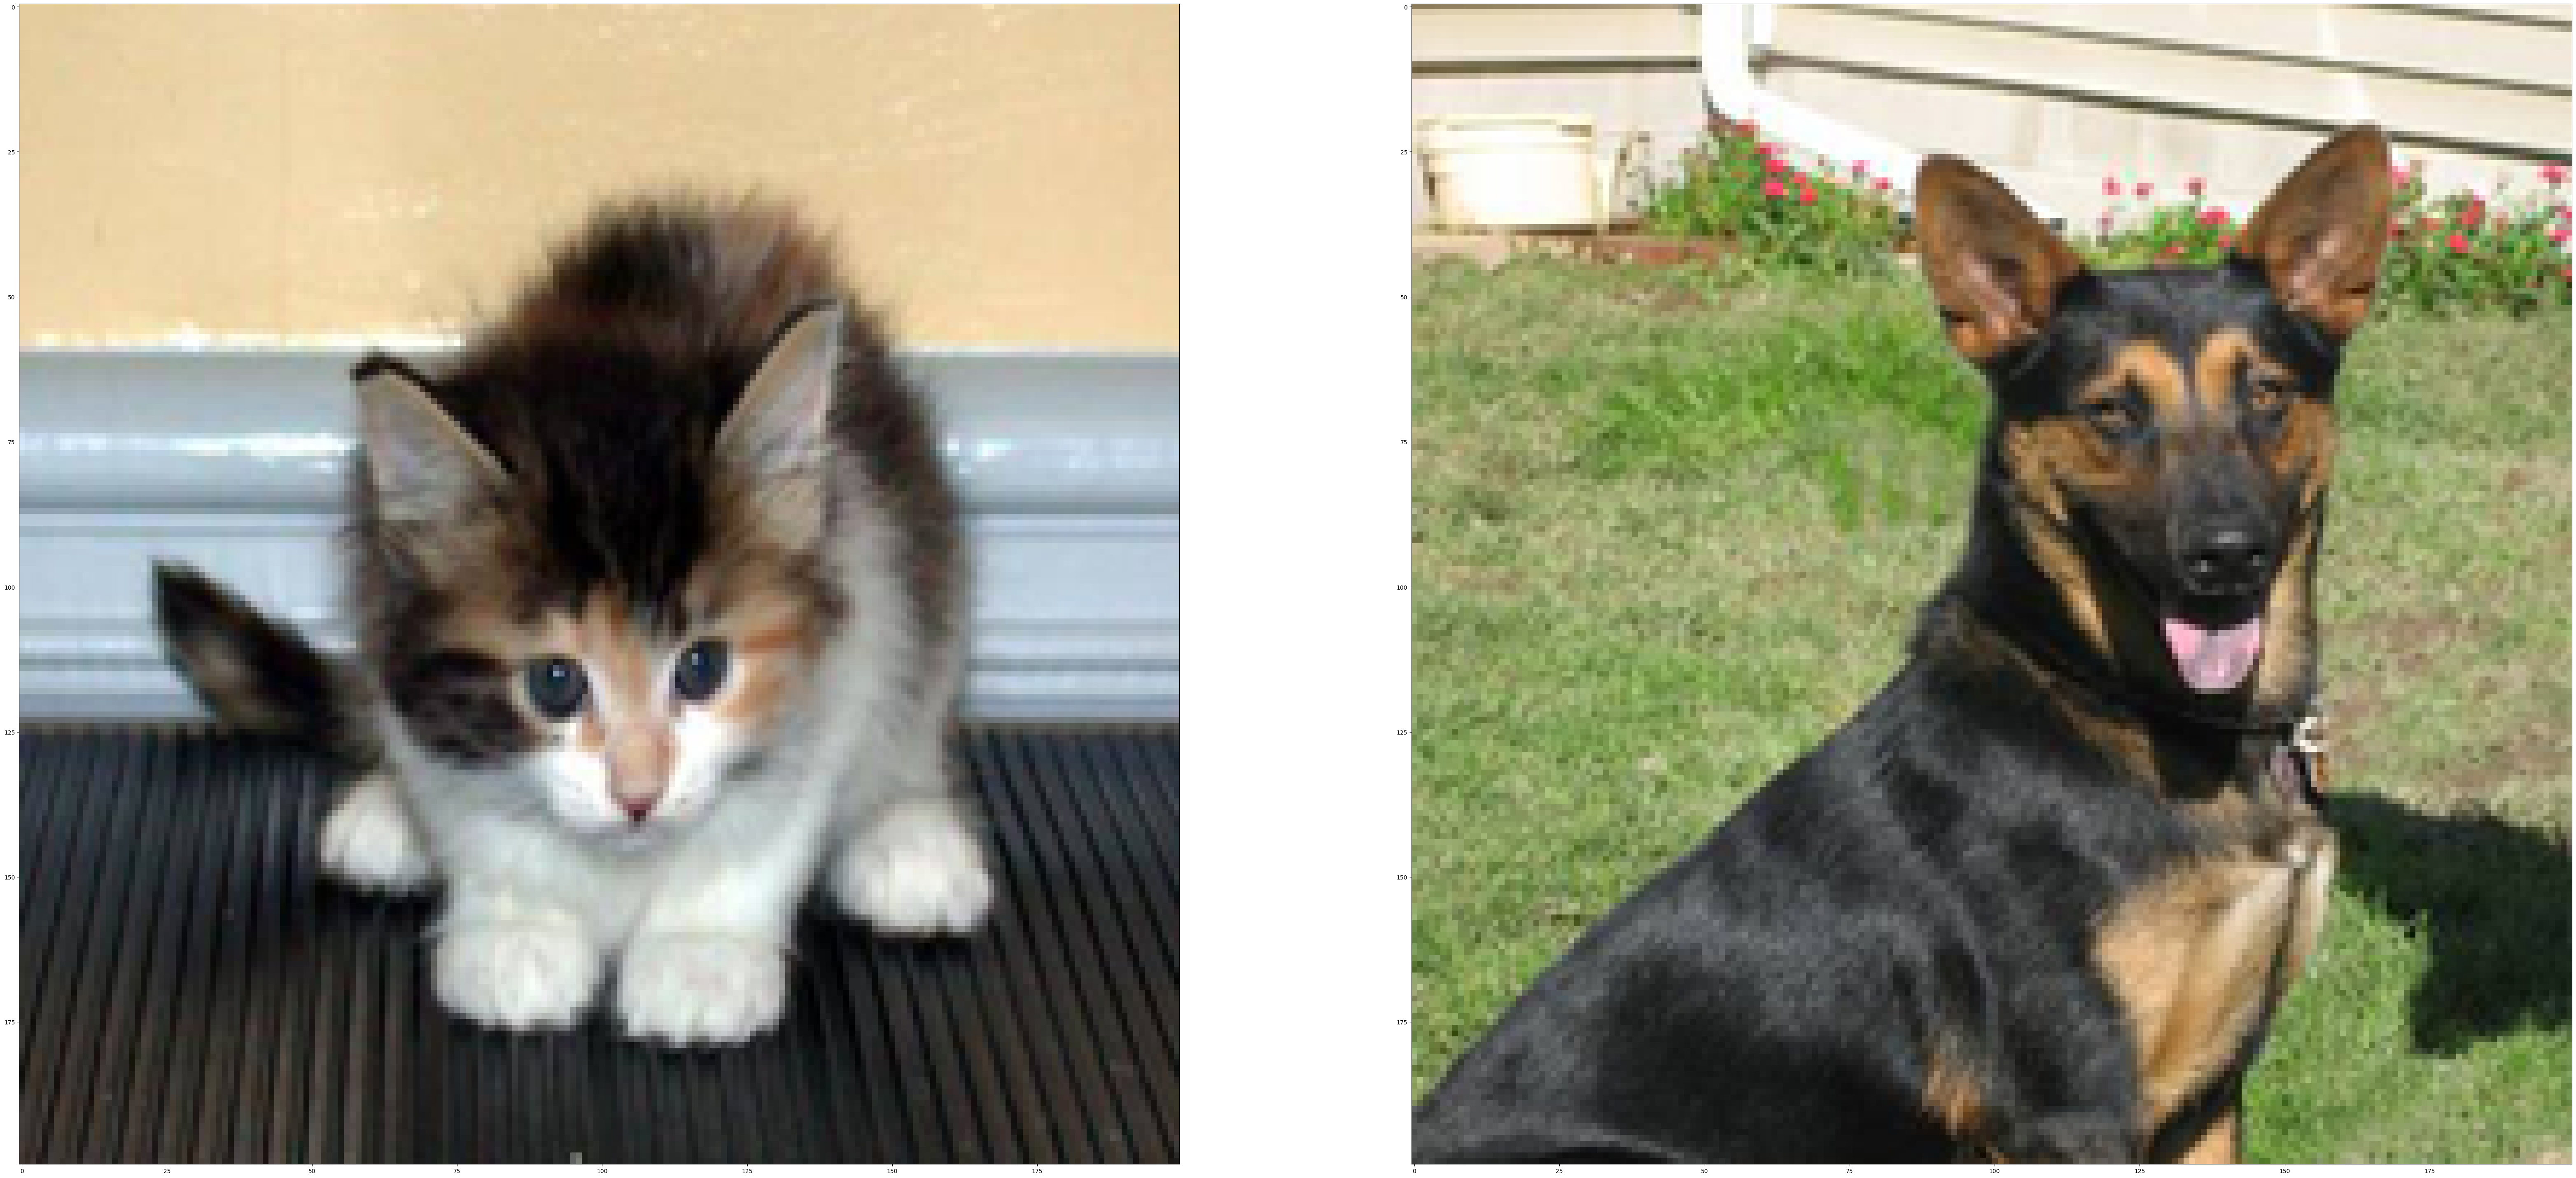

1/1 [==============================] - 0s 219ms/step


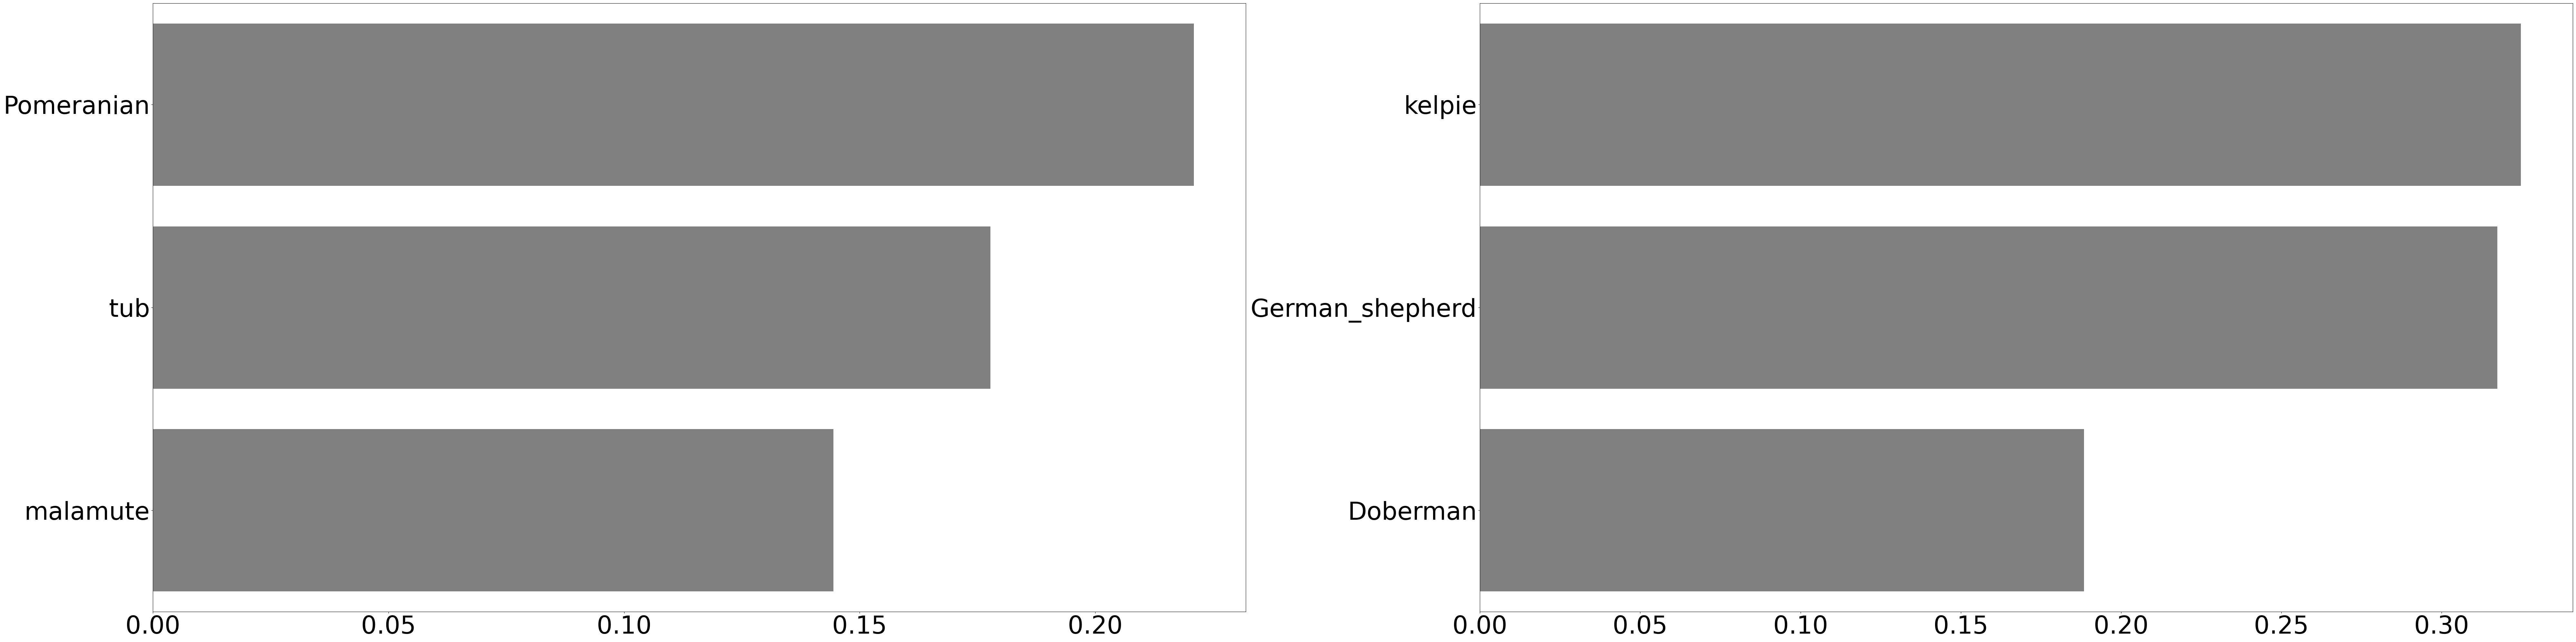

In [20]:
from tensorflow.keras.applications.resnet50 import ResNet50

# resnet_weights = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
# resnet_model = ResNet50(weights=resnet_weights)

resnet_model = ResNet50()
_get_predictions(resnet_model, len(sample_imgs))

### Xception Nets

Xception is an extension of the Inception architecture which replaces the standard Inception modules with depthwise separable convolutions.

In [21]:
from keras.applications.xception import Xception

# xception_weights = '../input/xception/xception_weights_tf_dim_ordering_tf_kernels.h5'
# xception_model = Xception(weights=xception_weights)

xception_model = Xception()

91884032/91884032 [==============================] - 1s 0us/step


### Feature Extraction using Pretrained Models

First step is to load the weights of the pre-trained model in the model architecture. Notice, that an additional argument is passed **include_top = False**, which states that we do not want to add the **last layer** of this architecture.

In [22]:
resnet50 = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [23]:
def _get_features(img_path):
  img = load_img(img_path, target_size=(224, 224))
  img_data = img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)  # axis=0:  [1, 2] => [[1, 2]]
  img_data = preprocess_input(img_data)
  resnet_features = resnet50.predict(img_data)
  return resnet_features

In [24]:
resnet_features = _get_features(img1)   # Last layer of the architecture
resnet_features.shape

1/1 [==============================] - 1s 1s/step


(1, 7, 7, 2048)

In [25]:
'''
One can flatten them or sequee them in order to use them in ML models. 
Flatten will produce a long vector of feature elements. 
Squeeze will produce a 3D matrix of the features
'''
feature_map1 = resnet_features.flatten()
feature_map2 = resnet_features.squeeze()

print ("Shape 1: ", feature_map1.shape)
print ("Shape 2: ", feature_map2.shape)

Shape 1:  (100352,)
Shape 2:  (7, 7, 2048)


### Transfer Learning

Transfer learning using pre-trained model features

Get Fruits 360 dataset from Github

In Github repo: 
* Click "Code"
* Right click to "Download ZIP"
* "Copy Link Location"

In [26]:
! wget --no-check-certificate \
    "https://github.com/Horea94/Fruit-Images-Dataset/archive/refs/heads/master.zip" \
    -O "/content/fruits_360_dataset.zip"

--2023-04-11 20:02:28--  https://github.com/Horea94/Fruit-Images-Dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master [following]
--2023-04-11 20:02:28--  https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.201.28.149
Connecting to codeload.github.com (codeload.github.com)|20.201.28.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/fruits_360_dataset.zip’

/content/fruits_360     [            <=>     ] 761.30M  21.2MB/s    in 43s     

2023-04-11 20:03:12 (17.8 MB/s) - ‘/content/fruits_360_dataset.zip’ saved [798281939]



In [27]:
unzip_file_to_current_directory('/content/fruits_360_dataset.zip')

In [28]:
fruits_root_path = '/content/Fruit-Images-Dataset-master/Training/'

class1 = os.listdir(fruits_root_path + 'Banana/')
class2 = os.listdir(fruits_root_path + 'Strawberry/')

data = {'banana': class1[:10], 'strawberry': class2[:10], 'test': [class1[11], class2[11]]}

Transfer learning can be implemented in two steps:

1. Image Feature Exraction
2. Training a Classifier

In [29]:
features = {'banana' : [], 'strawberry' : [], 'test' : []}
testimgs = []

for label, val in data.items():
  for k, each in enumerate(val):
    if label == 'test' and k == 0:
      img_path = fruits_root_path + "/Banana/" + each
      testimgs.append(img_path)
    elif label == "test" and k == 1:
      img_path = fruits_root_path + "/Strawberry/" + each
      testimgs.append(img_path)
    else:
      img_path = fruits_root_path + label.title() + '/' + each
    feats = _get_features(img_path)
    features[label].append(feats.flatten())

1/1 [==============================] - 0s 439ms/step


Convert the features from dictionary format to pandas dataframe. In order to reduce dimensionality, we can use variance filter, PCA, SVD...

In [31]:
dataset = pd.DataFrame()

for label, feats in features.items():
  temp_df = pd.DataFrame(feats)
  temp_df['label'] = label
  dataset = dataset.append(temp_df, ignore_index=True)

dataset.head()

<ipython-input-31-8475d5d7bb56>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(temp_df, ignore_index=True)
<ipython-input-31-8475d5d7bb56>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(temp_df, ignore_index=True)
<ipython-input-31-8475d5d7bb56>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(temp_df, ignore_index=True)


,0,1,2,3,4,5,6,7,8,9,...,100343,100344,100345,100346,100347,100348,100349,100350,100351,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,banana
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,banana
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343366,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,banana
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,banana
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,banana


### Prepare Dataset

In [32]:
y = dataset[dataset.label != 'test'].label
x = dataset[dataset.label != 'test'].drop('label', axis=1)  # drop label column

In [34]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

model = MLPClassifier(hidden_layer_sizes=(100, 10))
pipeline = Pipeline([('low_variance_filter', VarianceThreshold()), ('model', model)])
pipeline.fit(x, y)   # Model trained one pre-trained features

Pipeline(steps=[('low_variance_filter', VarianceThreshold()),
                ('model', MLPClassifier(hidden_layer_sizes=(100, 10)))])

### Predict Output on new images

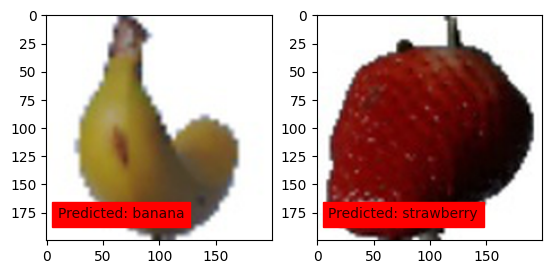

In [38]:
preds = pipeline.predict(features['test'])

f, ax = plt.subplots(1,2)

for i in range(2):
  ax[i].imshow(Image.open(testimgs[i]).resize((200,200), Image.ANTIALIAS))
  ax[i].text(10,180, 'Predicted: %s' % preds[i], color='k', backgroundcolor='red', alpha=0.8)
plt.show()

### Reference

https://www.kaggle.com/code/shivamb/cnn-architectures-vgg-resnet-inception-tl/notebook

https://keras.io/api/applications/

https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16